In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [31]:
df = pd.read_csv('accord_sedan.csv')
df

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic
...,...,...,...,...,...,...
412,12456,67564,2006,lx,4 Cyl,Automatic
413,10995,69775,2006,ex,4 Cyl,Automatic
414,16000,77997,2006,exl,4 Cyl,Automatic
415,14700,61892,2006,ex,4 Cyl,Automatic


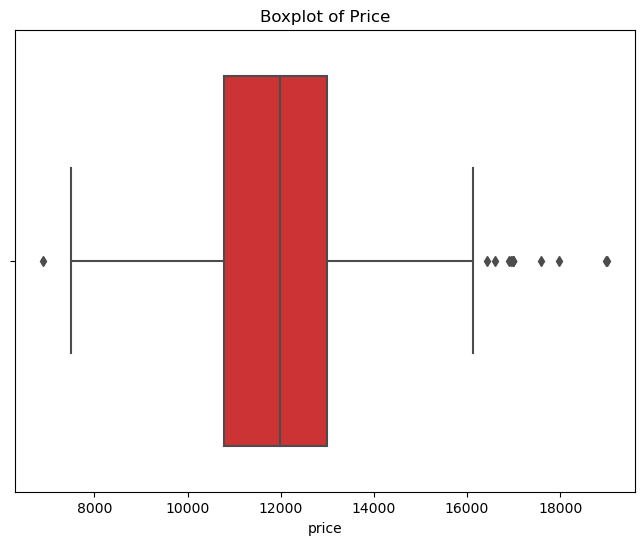

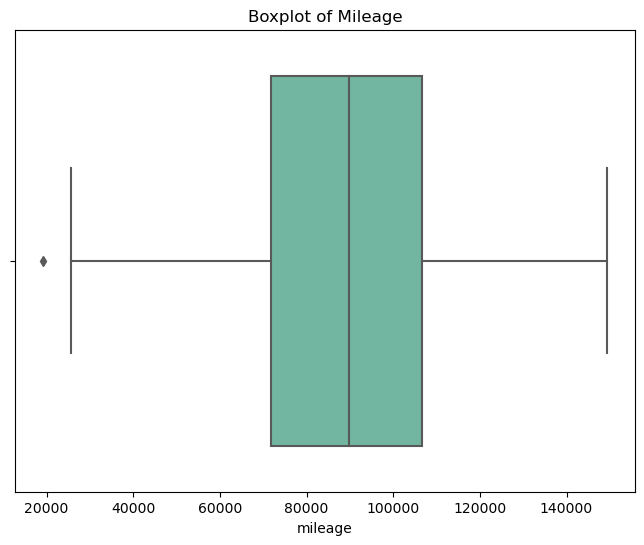

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='price', palette='Set1')
plt.title("Boxplot of Price")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df,  x='mileage', palette='Set2')
plt.title("Boxplot of Mileage")
plt.show()

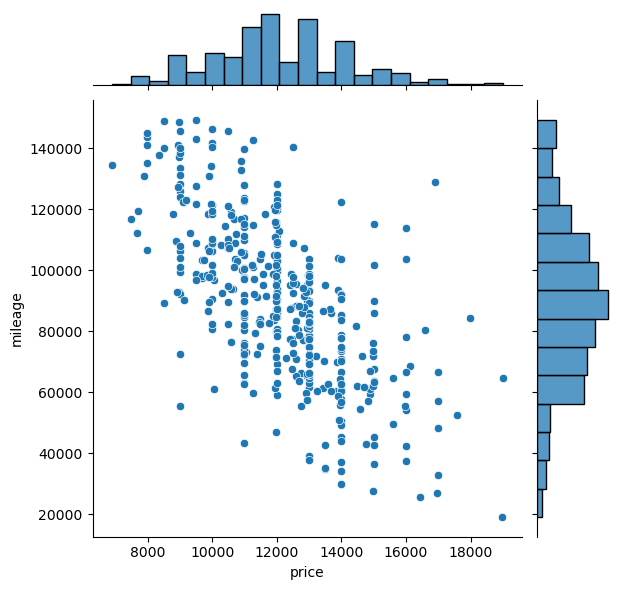

In [21]:
sns.jointplot(data=df, x='price', y='mileage')

<Axes: xlabel='price'>

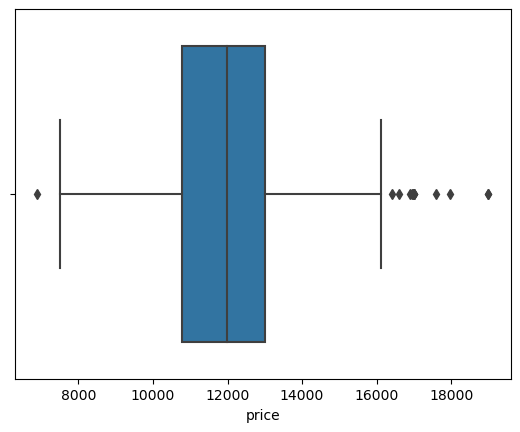

In [22]:
sns.boxplot(data=df, x='price')

<Axes: xlabel='mileage'>

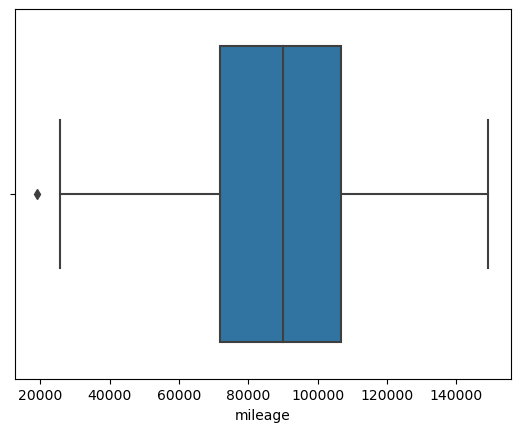

In [23]:
sns.boxplot(data=df, x='mileage')

In [34]:
df['isOutlierPrice'] = np.nan
df['isOutlierMileage'] = np.nan

In [35]:
df.isnull().sum()

price                 0
mileage               0
year                  0
trim                  0
engine                0
transmission          0
isOutlierPrice      417
isOutlierMileage    417
dtype: int64

In [42]:
price_mean = df['price'].mean()
mileage_mean = df['mileage'].mean()
price_std = df['price'].std()
mileage_std = df['mileage'].std()

price_mean, mileage_mean, price_std, mileage_std

(12084.242206235012, 89725.7793764988, 2061.430033967955, 25957.872270688917)

In [51]:
q1_mean= np.percentile(df['price'], 25)
q3_mean = np.percentile(df['price'], 75)

IQR_mean = q3_mean-q1_mean

outliers = df['price'][((df['price']<(q1_mean-1.5*IQR_mean)) | (df['price']>(q3_mean+1.5*IQR_mean)))]
outliers

78     16990
84     16595
138    16988
171    17591
200    16995
227    16420
234     6900
259    17975
270    18988
312    16950
313    16900
379    18995
382    16995
Name: price, dtype: int64

In [52]:
q1_mileage = np.percentile(df['mileage'], 25)
q3_mileage = np.percentile(df['mileage'], 75)

IQR_mileage = q3_mileage-q1_mileage

outliers_mileage = df['mileage'][((df['mileage']<(q1_mileage-1.5*IQR_mileage)) | (df['mileage']>(q3_mileage+1.5*IQR_mileage)))]
outliers_mileage

270    19160
Name: mileage, dtype: int64

In [59]:
price_condition = df['price'].isin(outliers)

# Update values in column 'A' based on the condition
df.loc[price_conditioncondition, 'isOutlierPrice'] = 1

price                 0
mileage               0
year                  0
trim                  0
engine                0
transmission          0
isOutlierPrice      404
isOutlierMileage    417
dtype: int64

In [62]:
mileage_condition = df['mileage'].isin(outliers_mileage)

df.loc[mileage_condition, 'isOutlierMileage'] = 1

df.isnull().sum()

price                 0
mileage               0
year                  0
trim                  0
engine                0
transmission          0
isOutlierPrice      404
isOutlierMileage    416
dtype: int64

In [64]:
df['isOutlierPrice'] = df['isOutlierPrice'].fillna(0)
df['isOutlierMileage'] = df['isOutlierMileage'].fillna(0)
df.isnull().sum()

price               0
mileage             0
year                0
trim                0
engine              0
transmission        0
isOutlierPrice      0
isOutlierMileage    0
dtype: int64

Text(0.5, 1.0, 'Outliers Detection')

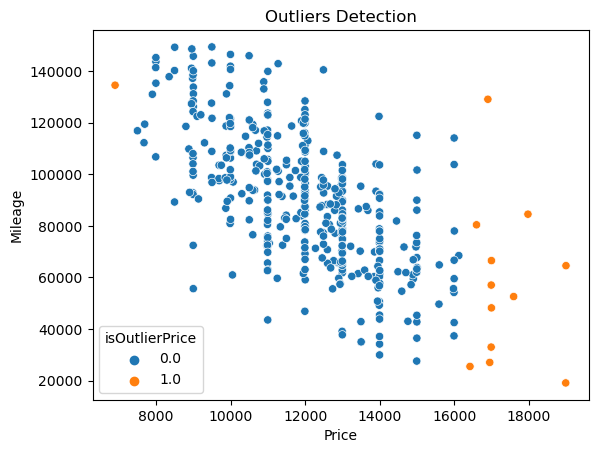

In [93]:
sns.scatterplot(data=df, x='price',y='mileage',hue=df['isOutlierPrice'])
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Outliers Detection')

## Exercises - 2 : Q-Q Plots

In [67]:
df_tuberculosis = pd.read_csv('TB_burden_countries_2014-09-29.csv')
df_tuberculosis

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,...,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,source_tbhiv,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,327.0,112.0,655.0,...,0.35,0.22,0.52,41.0,25.0,60.0,Model,20.0,13.0,32.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,359.0,172.0,613.0,...,0.36,0.19,0.58,45.0,24.0,73.0,Model,97.0,77.0,120.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,387.0,169.0,693.0,...,0.37,0.19,0.62,51.0,26.0,86.0,Model,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,412.0,186.0,724.0,...,0.38,0.20,0.63,58.0,30.0,95.0,Model,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,431.0,199.0,751.0,...,0.40,0.21,0.64,65.0,35.0,100.0,Model,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,Zimbabwe,ZW,ZWE,716,AFR,2008,12784041,445.0,56.0,1228.0,...,574.00,447.00,716.00,73000.0,57000.0,92000.0,Surveillance,40.0,32.0,51.0
4899,Zimbabwe,ZW,ZWE,716,AFR,2009,12888918,423.0,49.0,1192.0,...,531.00,408.00,670.00,68000.0,53000.0,86000.0,Surveillance,50.0,40.0,65.0
4900,Zimbabwe,ZW,ZWE,716,AFR,2010,13076978,438.0,70.0,1136.0,...,480.00,371.00,603.00,63000.0,48000.0,79000.0,Surveillance,53.0,43.0,69.0
4901,Zimbabwe,ZW,ZWE,716,AFR,2011,13358738,458.0,93.0,1107.0,...,433.00,335.00,543.00,58000.0,45000.0,73000.0,Surveillance,48.0,38.0,62.0


In [68]:
df_tuberculosis.isnull().sum()

country                        0
iso2                          23
iso3                           0
iso_numeric                    0
g_whoregion                    0
year                           0
e_pop_num                      0
e_prev_100k                   11
e_prev_100k_lo                11
e_prev_100k_hi                11
e_prev_num                    11
e_prev_num_lo                 11
e_prev_num_hi                 11
e_mort_exc_tbhiv_100k          1
e_mort_exc_tbhiv_100k_lo       1
e_mort_exc_tbhiv_100k_hi       1
e_mort_exc_tbhiv_num           1
e_mort_exc_tbhiv_num_lo        1
e_mort_exc_tbhiv_num_hi        1
source_mort                    1
e_inc_100k                     1
e_inc_100k_lo                  1
e_inc_100k_hi                  1
e_inc_num                      1
e_inc_num_lo                   1
e_inc_num_hi                   1
e_tbhiv_prct                1250
e_tbhiv_prct_lo             1446
e_tbhiv_prct_hi             1446
e_inc_tbhiv_100k            1306
e_inc_tbhi

In [69]:
numeric_columns_mean = df_tuberculosis.select_dtypes(include=['number']).mean()
numeric_columns_mean

iso_numeric                 4.334875e+02
year                        2.001042e+03
e_pop_num                   2.899179e+07
e_prev_100k                 2.076944e+02
e_prev_100k_lo              9.368330e+01
e_prev_100k_hi              3.781370e+02
e_prev_num                  6.914368e+04
e_prev_num_lo               4.366106e+04
e_prev_num_hi               1.064607e+05
e_mort_exc_tbhiv_100k       1.624542e+01
e_mort_exc_tbhiv_100k_lo    7.022778e+00
e_mort_exc_tbhiv_100k_hi    5.284693e+01
e_mort_exc_tbhiv_num        5.846978e+03
e_mort_exc_tbhiv_num_lo     3.185193e+03
e_mort_exc_tbhiv_num_hi     1.017236e+04
e_inc_100k                  1.352241e+02
e_inc_100k_lo               1.067412e+02
e_inc_100k_hi               1.692454e+02
e_inc_num                   4.098767e+04
e_inc_num_lo                3.327411e+04
e_inc_num_hi                5.042804e+04
e_tbhiv_prct                1.124149e+01
e_tbhiv_prct_lo             1.134943e+01
e_tbhiv_prct_hi             1.154434e+01
e_inc_tbhiv_100k

In [70]:
df_tuberculosis = df_tuberculosis.fillna(value = numeric_columns_mean)
df_tuberculosis.isnull().sum()

country                      0
iso2                        23
iso3                         0
iso_numeric                  0
g_whoregion                  0
year                         0
e_pop_num                    0
e_prev_100k                  0
e_prev_100k_lo               0
e_prev_100k_hi               0
e_prev_num                   0
e_prev_num_lo                0
e_prev_num_hi                0
e_mort_exc_tbhiv_100k        0
e_mort_exc_tbhiv_100k_lo     0
e_mort_exc_tbhiv_100k_hi     0
e_mort_exc_tbhiv_num         0
e_mort_exc_tbhiv_num_lo      0
e_mort_exc_tbhiv_num_hi      0
source_mort                  1
e_inc_100k                   0
e_inc_100k_lo                0
e_inc_100k_hi                0
e_inc_num                    0
e_inc_num_lo                 0
e_inc_num_hi                 0
e_tbhiv_prct                 0
e_tbhiv_prct_lo              0
e_tbhiv_prct_hi              0
e_inc_tbhiv_100k             0
e_inc_tbhiv_100k_lo          0
e_inc_tbhiv_100k_hi          0
e_inc_tb

In [73]:
data = df_tuberculosis['e_prev_100k_hi']

mean = data.mean()
std_dev = data.std()

(array([2.88729798e-03, 8.10228685e-04, 5.25275376e-04, 3.57049929e-04,
        2.83808918e-04, 2.33455723e-04, 1.61359102e-04, 1.01850781e-04,
        7.09522295e-05, 3.31873331e-05, 2.97541607e-05, 2.86097699e-05,
        2.40322068e-05, 1.94546436e-05, 1.14439080e-05, 9.15512638e-06,
        8.01073559e-06, 1.02995172e-05, 2.28878160e-06, 3.43317239e-06]),
 array([5.400000e-01, 1.787630e+02, 3.569860e+02, 5.352090e+02,
        7.134320e+02, 8.916550e+02, 1.069878e+03, 1.248101e+03,
        1.426324e+03, 1.604547e+03, 1.782770e+03, 1.960993e+03,
        2.139216e+03, 2.317439e+03, 2.495662e+03, 2.673885e+03,
        2.852108e+03, 3.030331e+03, 3.208554e+03, 3.386777e+03,
        3.565000e+03]),
 <BarContainer object of 20 artists>)

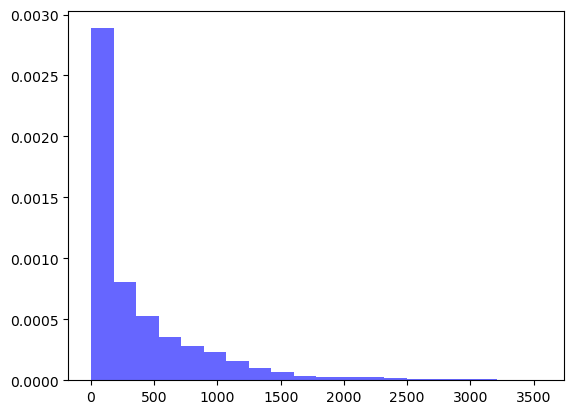

In [74]:
plt.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Data Histogram')

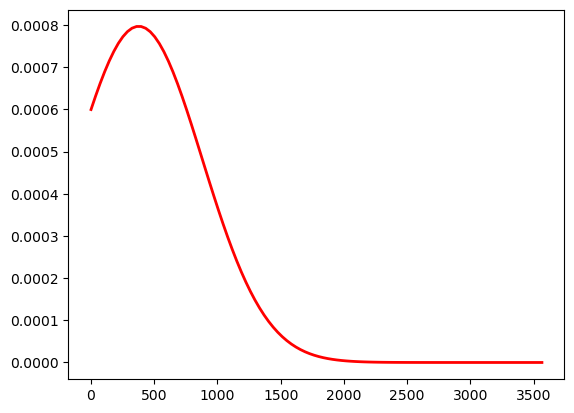

In [77]:
x = np.linspace(data.min(), data.max(), 100)
pdf = norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, 'r', linewidth=2, label='Normal Distribution')

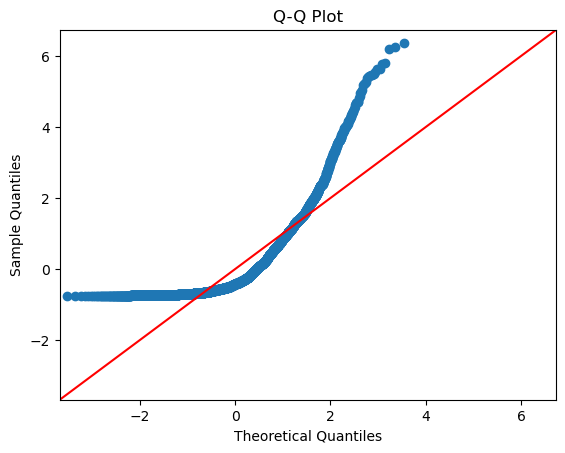

In [82]:
import statsmodels.api as sm
column_to_plot = df_tuberculosis['e_prev_100k_hi']

# Create a Q-Q plot
sm.qqplot(column_to_plot, line='45', fit=True)
plt.title("Q-Q Plot")
plt.show()

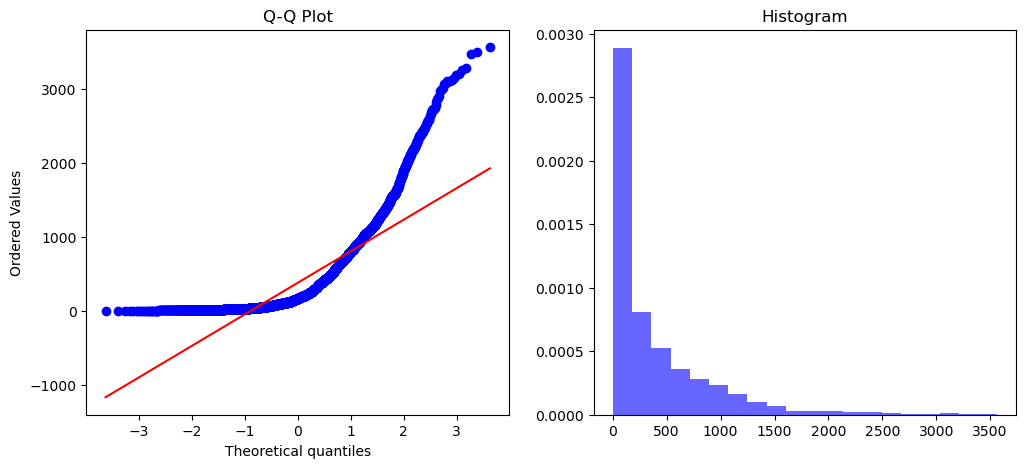

In [97]:
import scipy.stats as stats
# Create a Q-Q plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
stats.probplot(column_to_plot, dist="norm", plot=plt)
plt.title("Q-Q Plot")

# Create a histogram
plt.subplot(1, 2, 2)
plt.hist(column_to_plot, bins=20, density=True, alpha=0.6, color='b')
plt.title("Histogram")

plt.show()


## Exercises - 3 : Distributions & Sampling & Robust Statistics

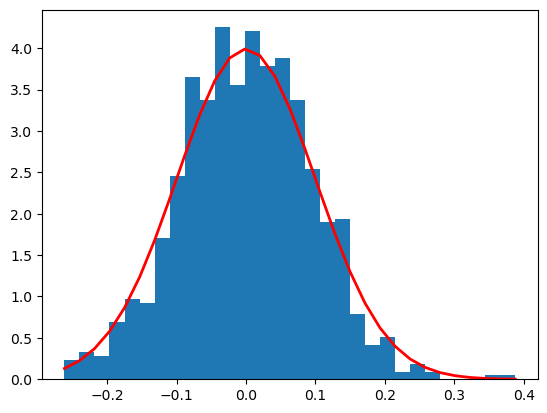

In [100]:
mu, sigma = 0, 0.1 # mean and standard deviation
>>> s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

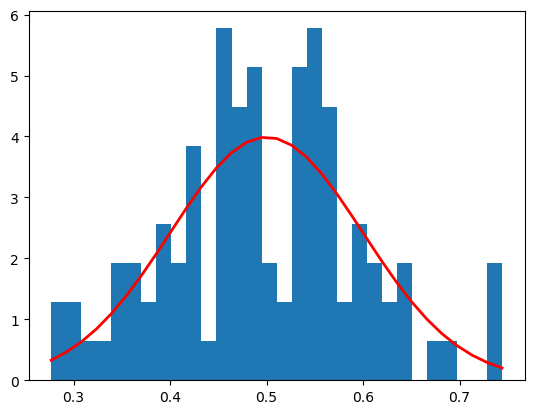

In [101]:
mu, sigma = 0.5, 0.1 # mean and standard deviation
>>> s = np.random.normal(mu, sigma, 100)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

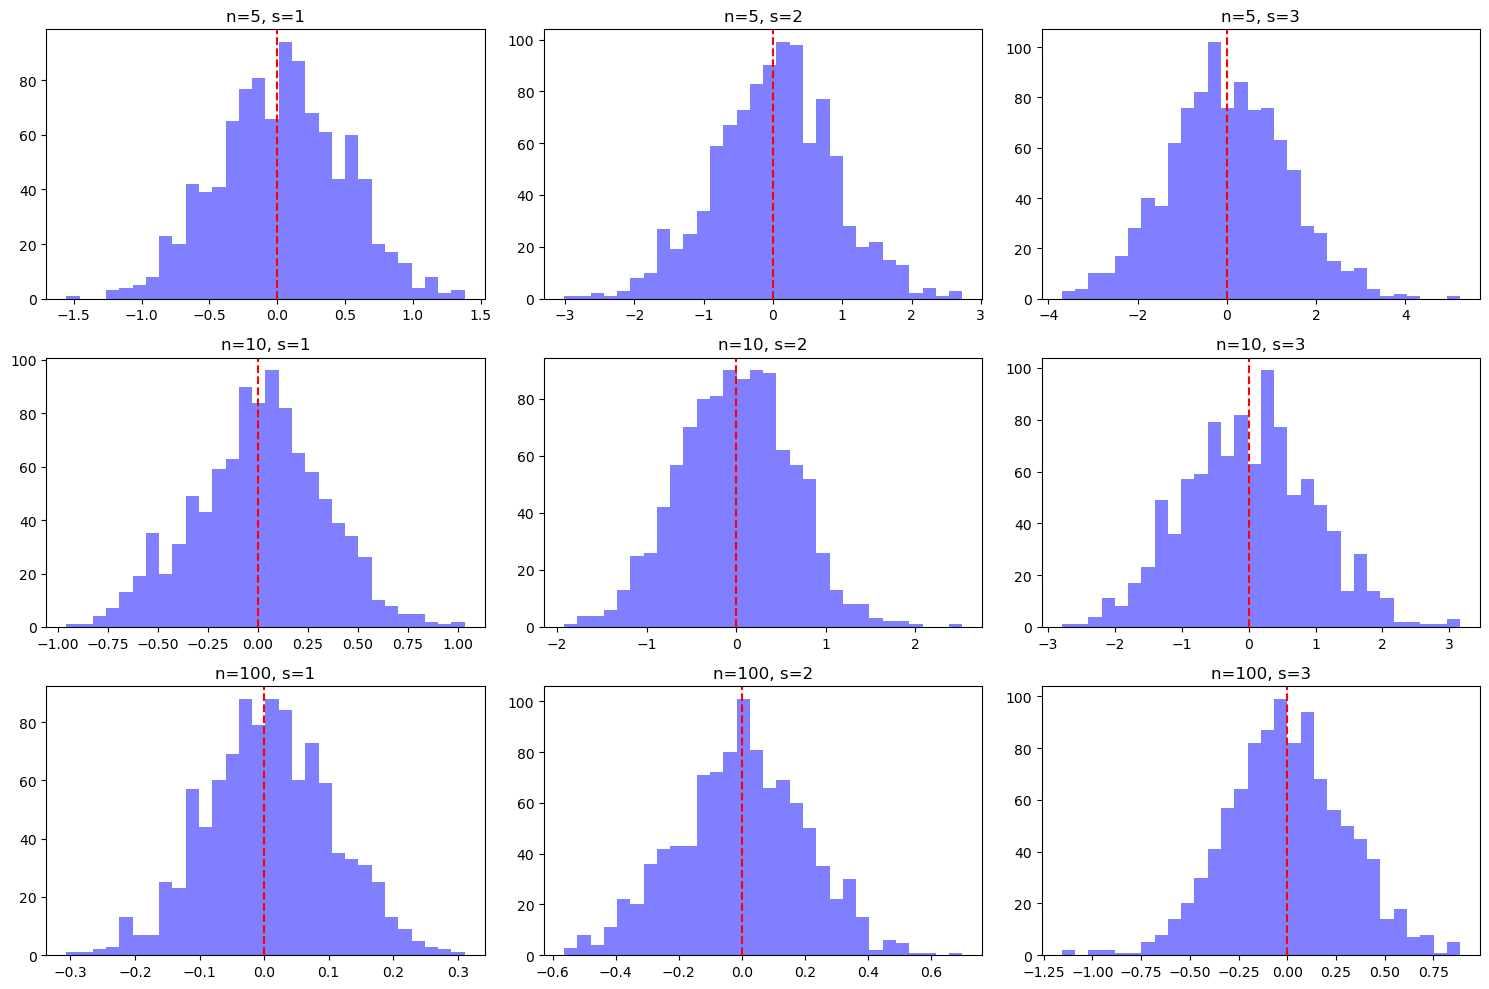

n=5, s=1
Mean: 0.0266
Standard Deviation: 0.9415
Skewness: -0.0078
Kurtosis: -0.9901
---
n=5, s=2
Mean: 0.0154
Standard Deviation: 1.9059
Skewness: -0.0149
Kurtosis: -0.9826
---
n=5, s=3
Mean: 0.0232
Standard Deviation: 2.7909
Skewness: 0.0106
Kurtosis: -0.9708
---
n=10, s=1
Mean: 0.0109
Standard Deviation: 0.9799
Skewness: 0.0074
Kurtosis: -0.5484
---
n=10, s=2
Mean: -0.0025
Standard Deviation: 1.9369
Skewness: 0.0264
Kurtosis: -0.5369
---
n=10, s=3
Mean: 0.0059
Standard Deviation: 2.9244
Skewness: -0.0073
Kurtosis: -0.5271
---
n=100, s=1
Mean: 0.0082
Standard Deviation: 1.0003
Skewness: 0.0126
Kurtosis: -0.0451
---
n=100, s=2
Mean: -0.0012
Standard Deviation: 1.9920
Skewness: 0.0059
Kurtosis: -0.0706
---
n=100, s=3
Mean: -0.0026
Standard Deviation: 2.9860
Skewness: 0.0039
Kurtosis: -0.0507
---


In [103]:
# Define parameters
sample_sizes = [5, 10, 100]
std_devs = [1, 2, 3]  # Different standard deviations

# Storage for statistics
means, stds, skewness, kurtosis = [], [], [], []

# Number of sampling rounds
num_samples = 1000

# Sample data and compute statistics
for n in sample_sizes:
    for s in std_devs:
        sample_means, sample_stds, sample_skewness, sample_kurtosis = [], [], [], []
        for _ in range(num_samples):
            data = np.random.normal(loc=0, scale=s, size=n)
            stats = describe(data)
            sample_means.append(stats.mean)
            sample_stds.append(stats.variance ** 0.5)  # Convert variance to standard deviation
            sample_skewness.append(stats.skewness)
            sample_kurtosis.append(stats.kurtosis)
        
        means.append(sample_means)
        stds.append(sample_stds)
        skewness.append(sample_skewness)
        kurtosis.append(sample_kurtosis)

# Visualize the results
plt.figure(figsize=(15, 10))

for i in range(len(sample_sizes)):
    for j in range(len(std_devs)):
        plt.subplot(len(sample_sizes), len(std_devs), i * len(std_devs) + j + 1)
        plt.hist(means[i * len(std_devs) + j], bins=30, alpha=0.5, color='blue', label='Sampled Means')
        plt.axvline(x=0, color='red', linestyle='--', label='Population Mean')
        plt.title(f'n={sample_sizes[i]}, s={std_devs[j]}')

plt.tight_layout()
plt.show()

# Observations
for i, n in enumerate(sample_sizes):
    for j, s in enumerate(std_devs):
        print(f'n={n}, s={s}')
        print(f'Mean: {np.mean(means[i * len(std_devs) + j]):.4f}')
        print(f'Standard Deviation: {np.mean(stds[i * len(std_devs) + j]):.4f}')
        print(f'Skewness: {np.mean(skewness[i * len(std_devs) + j]):.4f}')
        print(f'Kurtosis: {np.mean(kurtosis[i * len(std_devs) + j]):.4f}')
        print('---')
